In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats 
import numpy as np

In [2]:
df = pd.read_csv(r'C:\Users\vinem\OneDrive\Рабочий стол\framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


I labeled each value in the table to make it clearer to me 

In [3]:
#currentSmoker - чел. который курит
#cigsPerDay - сколько сигарет в день
#BPMeds - принимал ли лекарства на момент первого исследования
#prevalentStroke - были или не были случаи инсульта
#prevalentHyp - есть/нет артериальная гипертензия
#diabetes - есть/нет диабет 
#totChol - холестерин 
#sysBP - систолическое кровяное давление мм рт. ст.
#diaBP - диастолическое кровяное давление
#BMI - вес
#heartRate- показатели давления 
#glucose - уровень глюкозы
#TenYearCHD - фактор риска ишемеческой болезни сердца

Below I will check how many rows and columns, I will also look at missing values and total values (like average, quantiles, etc.). Then I'll run a loop to count the missing values

In [4]:
df.shape

(4240, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
male,4240.0,0.429245,0.495027,0.00,0.00,0.0,1.00,1.0
age,4240.0,49.580189,8.572942,32.00,42.00,49.0,56.00,70.0
education,4135.0,1.979444,1.019791,1.00,1.00,2.0,3.00,4.0
currentSmoker,4240.0,0.494104,0.500024,0.00,0.00,0.0,1.00,1.0
cigsPerDay,4211.0,9.005937,11.922462,0.00,0.00,0.0,20.00,70.0
BPMeds,4187.0,0.029615,0.169544,0.00,0.00,0.0,0.00,1.0
prevalentStroke,4240.0,0.005896,0.076569,0.00,0.00,0.0,0.00,1.0
prevalentHyp,4240.0,0.310613,0.462799,0.00,0.00,0.0,1.00,1.0
diabetes,4240.0,0.025708,0.158280,0.00,0.00,0.0,0.00,1.0
totChol,4190.0,236.699523,44.591284,107.00,206.00,234.0,263.00,696.0


In [7]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

I will not include heartRate because there is only one missing value 

In [8]:
list_missing_values = ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'glucose']

for i in list_missing_values:
    count = (((df[i].isnull().sum())/df[i].shape[0])*100).round(2)
    print(f'Missing values in {i} : {count}')

Missing values in education : 2.48
Missing values in cigsPerDay : 0.68
Missing values in BPMeds : 1.25
Missing values in totChol : 1.18
Missing values in BMI : 0.45
Missing values in glucose : 9.15


In general there are few missing values, so they will not interfere with the model and therefore I will not remove them 

I want to check more data for emissions with boxplot

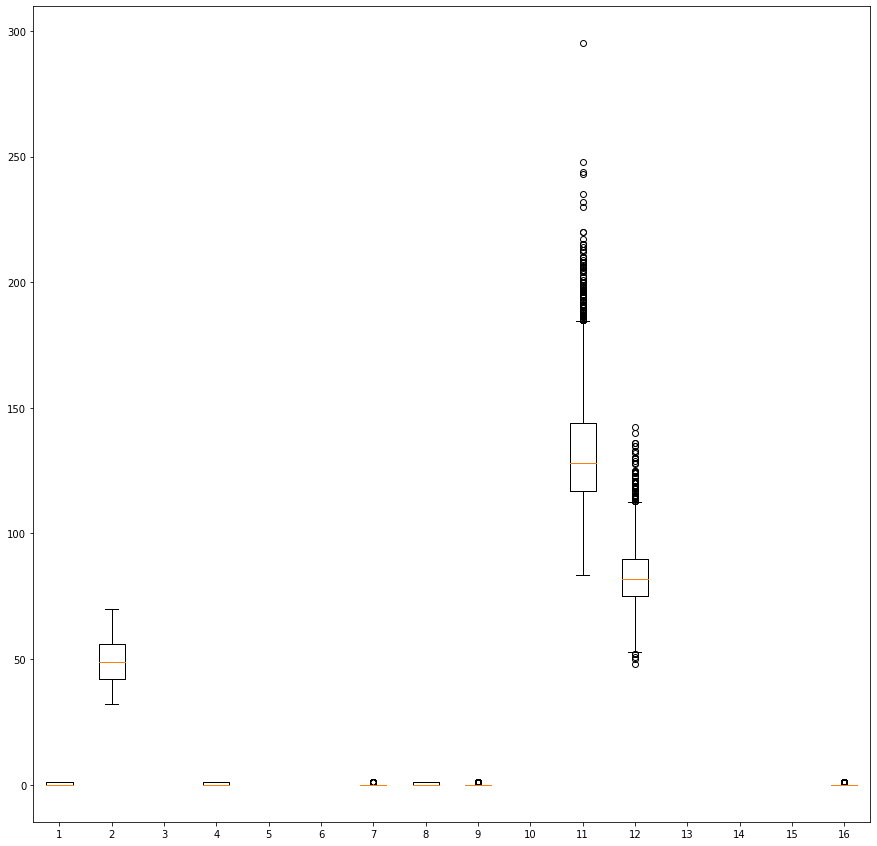

In [9]:
plt.figure(figsize = (15, 15))
plt.boxplot(df)
plt.show()

Emissions are present and even in large quantities.

Since the largest emissions are in columns 11 and 12, let's consider them in more detail

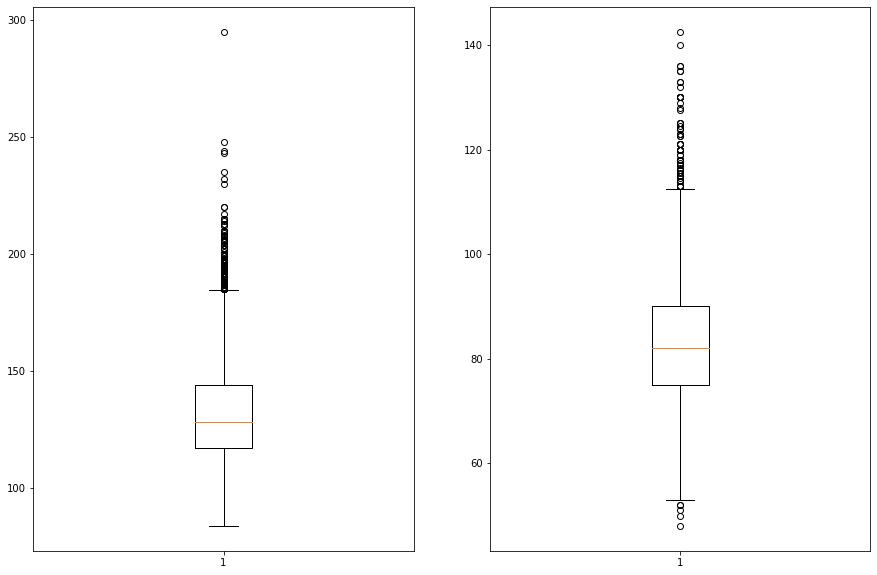

In [10]:
fig, ax = plt.subplots(1, 2, figsize = (15, 10))

ax[0].boxplot(df['sysBP'])
ax[1].boxplot(df['diaBP'])
plt.show()

Let's use quantiles for more accurate data

In [11]:
Q1_sys = np.percentile(df['sysBP'], 25, interpolation = 'midpoint')
Q3_sys = np.percentile(df['sysBP'], 75, interpolation = 'midpoint')
IQR_sys = Q3_sys - Q1_sys
upper_bound_sys = Q3_sys + (1.5 * IQR_sys)
lower_bound_sys = Q1_sys - (1.5 * IQR_sys)
print(f'interquartile range in sysBP: {IQR_sys}')
print(f'Upper bound box: {upper_bound_sys}')
print(f'Lower bound box: {lower_bound_sys}')

interquartile range in sysBP: 27.0
Upper bound box: 184.5
Lower bound box: 76.5


In [12]:
Q1_dia = np.percentile(df['diaBP'], 25, interpolation = 'midpoint')
Q3_dia = np.percentile(df['diaBP'], 75, interpolation = 'midpoint')
IQR_dia = Q3_dia - Q1_dia
upper_bound_dia = Q3_dia + (1.5 * IQR_dia)
lower_bound_dia = Q1_dia - (1.5 * IQR_dia)
print(f'interquartile range in diaBP: {IQR_dia}')
print(f'Upper bound box: {upper_bound_dia}')
print(f'Lower bound box: {lower_bound_dia}')

interquartile range in diaBP: 15.0
Upper bound box: 112.5
Lower bound box: 52.5


Once we have found the boundaries of the interquartile range, we can delete them further  

In [13]:
#outliers = [x for x in df['diaBP'] if x < upper_bound_dia and x > lower_bound_dia]

In [14]:
outliers = []

for x in df['diaBP']:
    if x < upper_bound_dia and x > lower_bound_dia:
        outliers.append(x)
    else:
        outliers.append(0)
df['diaBP_1'] = pd.DataFrame(outliers)

In [15]:
outliers_sys = []

for x in df['sysBP']:
    if x < upper_bound_sys and x > lower_bound_sys:
        outliers_sys.append(x)
    else:
        outliers_sys.append(0)
df['sysBP_1'] = pd.DataFrame(outliers_sys)

In [16]:
#df = df.merge(df['sysBP_1'])
#df = df.merge(df['diaBP_1'])

In [17]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,diaBP_1,sysBP_1
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,70.0,106.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,81.0,121.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,80.0,127.5
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,95.0,150.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,84.0,130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0,72.0,131.0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0,87.0,126.5
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0,83.0,133.5
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0,98.0,141.0


In [18]:
df.drop(['sysBP', 'diaBP'], axis = 1, inplace = True)

After I worked with the outliers, that is, I excluded the outliers, put a value of 0 in their place, and added new columns in the dataframe, and deleted the old ones.
Now let's look at the boxplot and compare the outliers

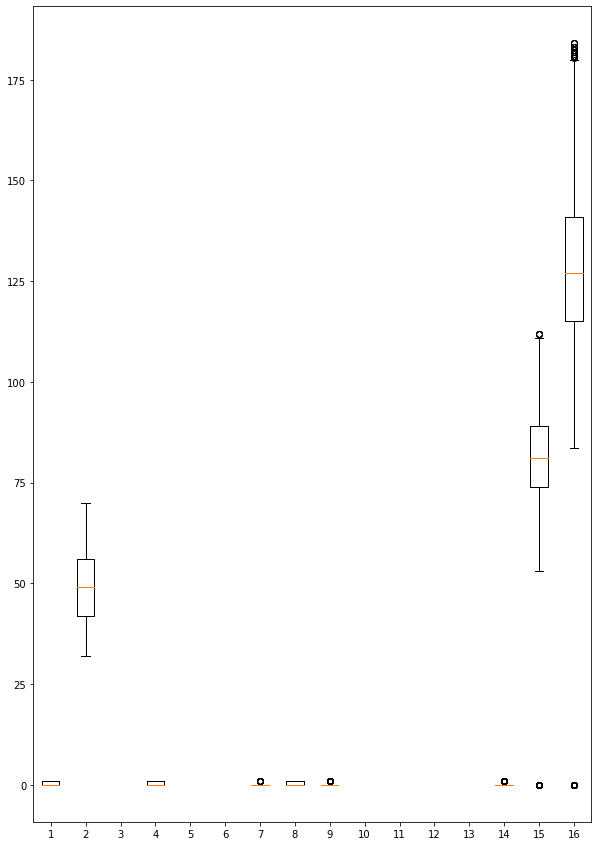

In [19]:
plt.figure(figsize = (10, 15))
plt.boxplot(df)
plt.show()

There are definitely a lot fewer emissions, and I don't think it will interfere with the model's training

In [20]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,diaBP_1,sysBP_1
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,26.97,80.0,77.0,0,70.0,106.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,28.73,95.0,76.0,0,81.0,121.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,25.34,75.0,70.0,0,80.0,127.5
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,28.58,65.0,103.0,1,95.0,150.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,23.10,85.0,85.0,0,84.0,130.0


Now we will look at the dependencies on different variables

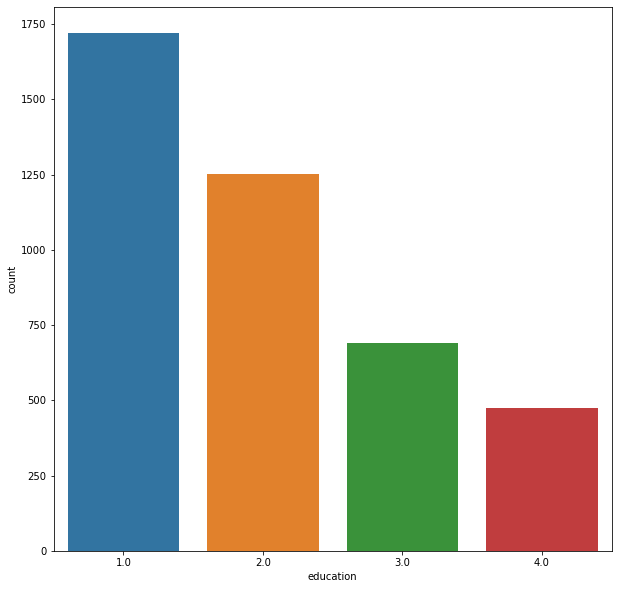

In [21]:
plt.figure(figsize = (10, 10))
sns.countplot(x = 'education', data = df)
plt.show()

Most people do not have a higher education 

<Figure size 720x720 with 0 Axes>

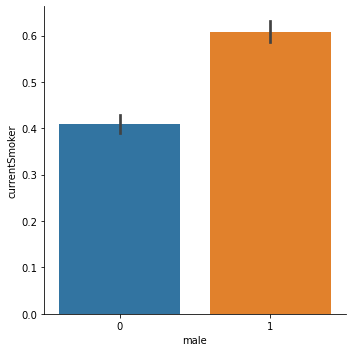

In [22]:
plt.figure(figsize = (10, 10))
sns.catplot(x = 'male', y = 'currentSmoker', kind = 'bar', data = df)
plt.show()

So we'll see how many people in general smoke, both women and men 

<Figure size 720x720 with 0 Axes>

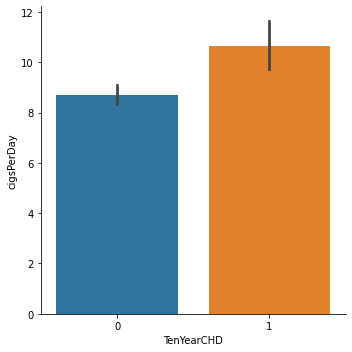

In [23]:
plt.figure(figsize = (10, 10))
sns.catplot(x = 'TenYearCHD', y = 'cigsPerDay', kind = 'bar', data = df)
plt.show()

Dependence on smoking to increase the risk of CHD

<Figure size 720x720 with 0 Axes>

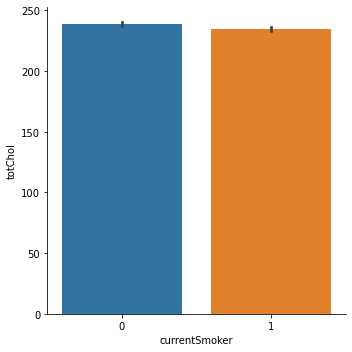

In [24]:
plt.figure(figsize = (10, 10))
sns.catplot(x = 'currentSmoker', y = 'totChol', kind = 'bar', data = df)
plt.show()

Dependence of smoking on cholesterol, and it turns out that very dependent 

<Figure size 720x720 with 0 Axes>

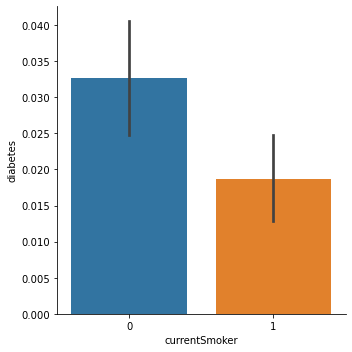

In [25]:
plt.figure(figsize = (10, 10))
sns.catplot(x = 'currentSmoker', y = 'diabetes', kind = 'bar', data = df)
plt.show()

Diabetes smoking addiction

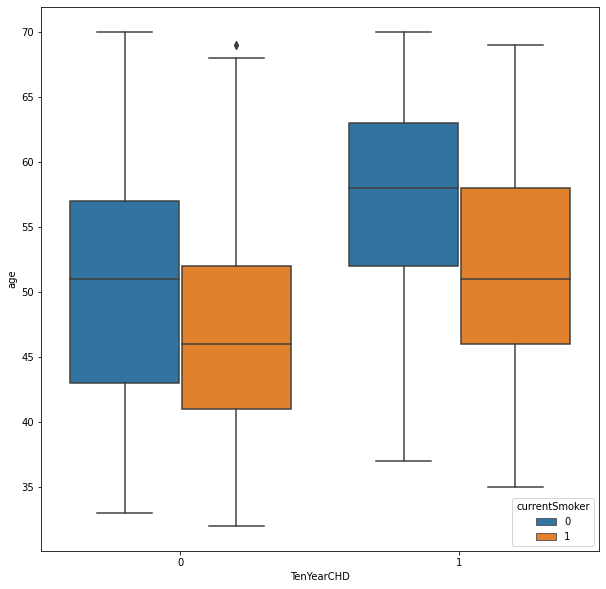

In [26]:
plt.figure(figsize = (10, 10))
sns.boxplot(x = 'TenYearCHD', y = 'age', hue = 'currentSmoker', data = df)
plt.show()

Here we consider the dependence of CHD on age, 
we can say that smokers are more susceptible to this disease, 
but people who do not smoke are still not deprived of the opportunity, though less

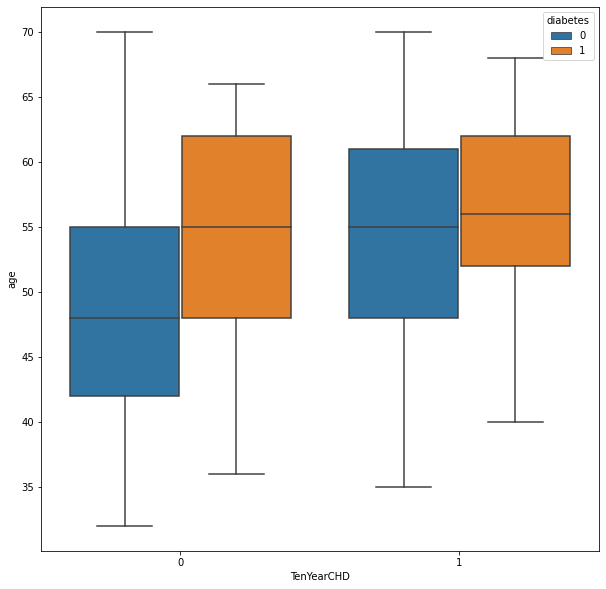

In [27]:
plt.figure(figsize = (10, 10))
sns.boxplot(x = 'TenYearCHD', y = 'age', hue = 'diabetes', data = df)
plt.show()

Older people are more likely to get diabetes

<Figure size 720x720 with 0 Axes>

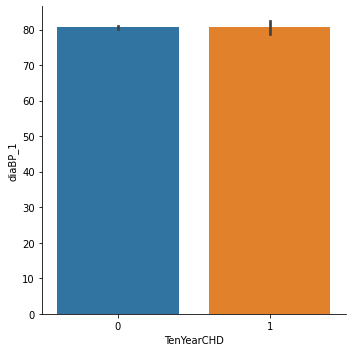

In [28]:
plt.figure(figsize = (10, 10))
sns.catplot(x = 'TenYearCHD', y = 'diaBP_1', kind = 'bar', data = df)
plt.show()

<Figure size 720x720 with 0 Axes>

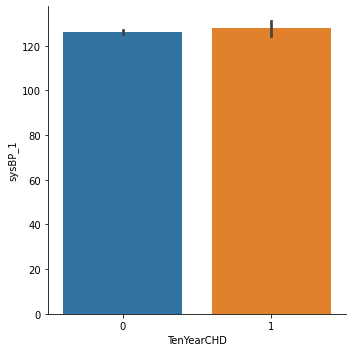

In [29]:
plt.figure(figsize = (10, 10))
sns.catplot(x = 'TenYearCHD', y = 'sysBP_1', kind = 'bar', data = df)
plt.show()

Systolic blood pressure and diastolic blood pressure correlate strongly with the disease

Now let's look at how weight affects this disease

<Figure size 720x720 with 0 Axes>

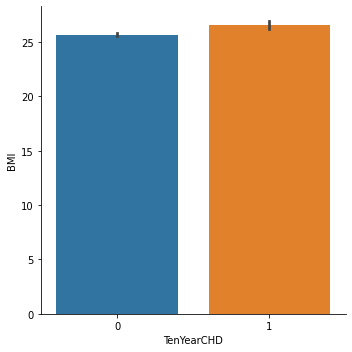

In [30]:
plt.figure(figsize = (10, 10))
sns.catplot(x = 'TenYearCHD', y = 'BMI', kind = 'bar', data = df)
plt.show()

That is, the differences are quite small, but nevertheless, people whose weight is greater are more susceptible to the disease

Now let's look at the correlation between stroke and this disease  

<Figure size 720x720 with 0 Axes>

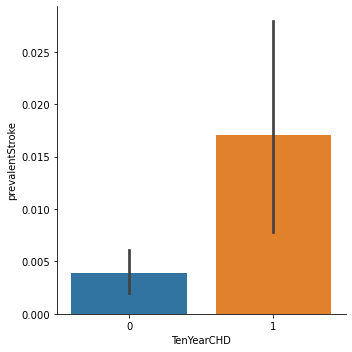

In [31]:
plt.figure(figsize = (10, 10))
sns.catplot(x = 'TenYearCHD', y = 'prevalentStroke', kind = 'bar', data = df)
plt.show()

We can say that if there was a stroke, there is a high probability of the manifestation of this disease 

Now when I start training the model, I need to remove the null values

In [32]:
df = df.dropna()

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics as m 
from xgboost import XGBRegressor
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

import warnings 
warnings.simplefilter(action='ignore')

In [34]:
X = df.drop('TenYearCHD', axis = 1)
y = df['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [35]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(m.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91       723
           1       0.05      0.67      0.09         9

    accuracy                           0.84       732
   macro avg       0.52      0.75      0.50       732
weighted avg       0.98      0.84      0.90       732



Logical regression already gives a good estimate, even without any parameters

In [37]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators = 10, random_state = 42)),
    ('kn', KNeighborsClassifier(n_neighbors = 10))
]

clf = StackingClassifier(estimators = estimators, final_estimator = LogisticRegression())
clf.fit(X_train, y_train)
y_pred_clf = clf.predict(X_test)
print(m.classification_report(y_pred_clf, y_test))
scores = cross_val_score(clf, X, y, cv = 3, scoring = 'accuracy')
print('Estimator cross_val_score:', (scores))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91       727
           1       0.02      0.60      0.05         5

    accuracy                           0.83       732
   macro avg       0.51      0.72      0.48       732
weighted avg       0.99      0.83      0.90       732

Estimator cross_val_score: [0.84508197 0.84823626 0.84823626]


So the model showed a score lower than on the usual logical model

In [38]:
knn = KNeighborsClassifier(n_neighbors = 25, algorithm = 'kd_tree')
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print(m.classification_report(y_pred_knn, y_test))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91       730
           1       0.01      0.50      0.02         2

    accuracy                           0.83       732
   macro avg       0.50      0.67      0.46       732
weighted avg       1.00      0.83      0.91       732



Separately, the model also did not perform any better 

In [39]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
print(m.classification_report(y_pred_svc, y_test))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91       727
           1       0.02      0.60      0.05         5

    accuracy                           0.83       732
   macro avg       0.51      0.72      0.48       732
weighted avg       0.99      0.83      0.90       732



In [40]:
rf = RandomForestClassifier(n_estimators = 10, random_state = 42)
vc = VotingClassifier(estimators = [
    ('lr', lr), ('rf', rf), ('knn', knn), ('svc', svc)
])
vc.fit(X_train, y_train)
y_pred_vc = vc.predict(X_test)
print(m.classification_report(y_pred_vc, y_test))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91       731
           1       0.00      0.00      0.00         1

    accuracy                           0.83       732
   macro avg       0.50      0.42      0.45       732
weighted avg       1.00      0.83      0.91       732



Score does not change using different methods, so the best score is logical regression equal to 84